Annalena Bebenroth (999523) und Maluna Hennecke (1007701) und Linus Kleine Kruthaup (978617)

In [1]:
import numpy as np
from brian2 import *
import matplotlib.pyplot as plt

# Question 1

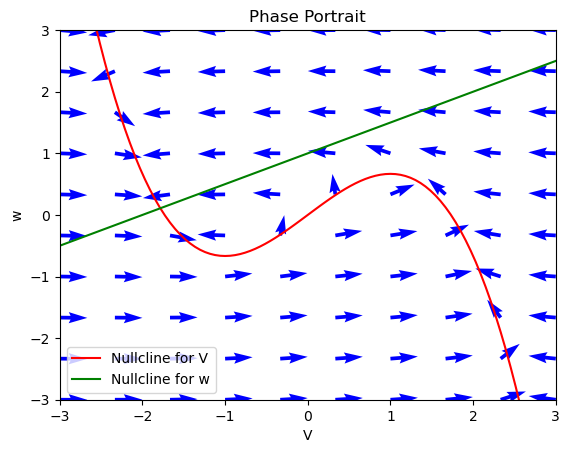

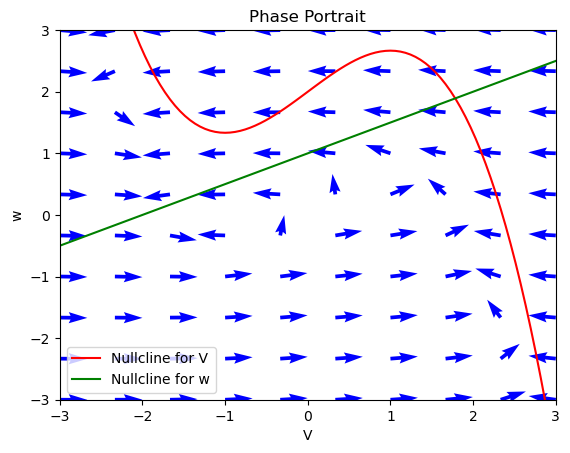

In [2]:
a = 1.0
b = 0.5
Phi = 0.1

def fhn_draw(I):

    V_vals = np.linspace(-3, 3, 100)
    w_vals = np.linspace(-3, 3, 100)

    nullcline_v_vals = V_vals - (V_vals**3)/3 + I
    nullcline_w_vals = V_vals + a - b * w_vals

    fig, ax = plt.subplots()

    ax.plot(V_vals, nullcline_v_vals, 'r', label='Nullcline for V')
    ax.plot(V_vals, nullcline_w_vals, 'g', label='Nullcline for w')

    for V in np.linspace(-3, 3, 10):
        for w in np.linspace(-3, 3, 10):
            dV_dt = V - (V**3)/3 - w
            dw_dt = Phi * (V + a - b*w)
            length = np.sqrt(dV_dt**2 + dw_dt**2)
            if length > 0:
                dV_dt /= length
                dw_dt /= length
                ax.quiver(V, w, dV_dt, dw_dt, angles='xy', scale_units='xy', scale=3, color='blue')

    # Set the axis limits
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])

    # Set the axis labels and title
    ax.set_xlabel('V')
    ax.set_ylabel('w')
    ax.set_title('Phase Portrait')

    # Set the legend
    ax.legend()

    # Show the plot
    plt.show()

fhn_draw(0)
fhn_draw(2)

# Question 2

In [7]:
def sin_FHN( I, sim_time):
    a = 1.0
    b = 0.5
    phi = 0.1

    eqs = """
    dV/dt = (V - ((V**3)/3) - w + I) /ms   :1
    dw/dt = (phi*(V + a - b*w))    /ms   :1
    """

    fhn_neuron = NeuronGroup(1, eqs, method= 'euler')
    # initial values
    fhn_neuron.V = -2
    fhn_neuron.w = 0.4

    state_monitor = StateMonitor(fhn_neuron, ["V", "w"], record=True)
    fhn_net = Network(fhn_neuron)
    fhn_net.add(state_monitor)
    fhn_net.run(sim_time)
    return state_monitor

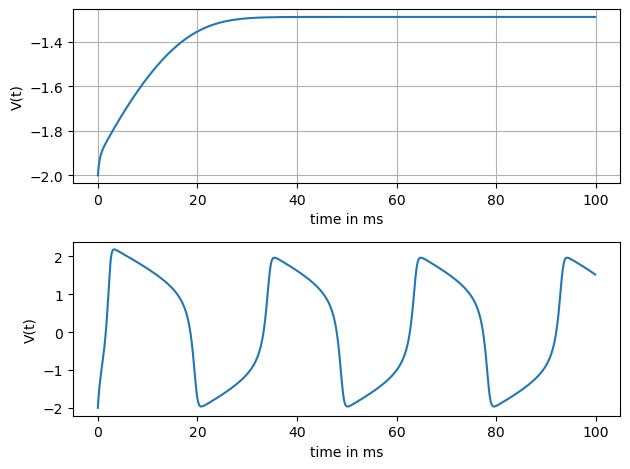

In [8]:
# V(t) for I=0 and I=2
fig, axs = plt.subplots(2, 1)
states = sin_FHN(I=0, sim_time=100*ms)
axs[0].plot(states.t/ms, states.V[0])
axs[0].set_xlabel('time in ms')
axs[0].set_ylabel('V(t)')
axs[0].grid(True)
states = sin_FHN(I=2, sim_time=100*ms)
axs[1].plot(states.t/ms, states.V[0])
axs[1].set_xlabel('time in ms')
axs[1].set_ylabel('V(t)')

fig.tight_layout()
plt.show()

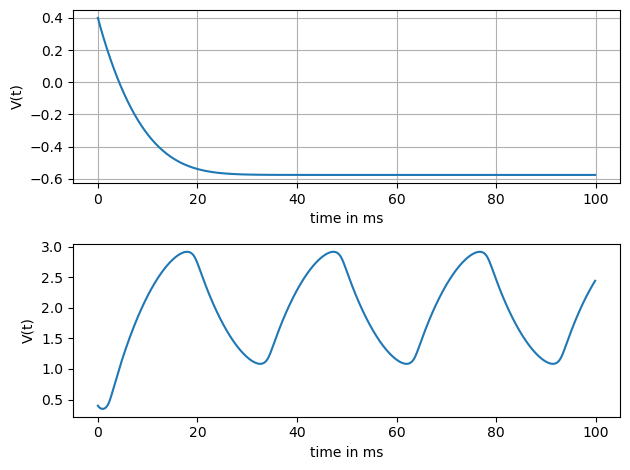

In [9]:
# w(t) for I=0 and I=2
fig, axs = plt.subplots(2, 1)
states = sin_FHN(I=0, sim_time=100*ms)
axs[0].plot(states.t/ms, states.w[0])
axs[0].set_xlabel('time in ms')
axs[0].set_ylabel('V(t)')
axs[0].grid(True)
states = sin_FHN(I=2, sim_time=100*ms)
axs[1].plot(states.t/ms, states.w[0])
axs[1].set_xlabel('time in ms')
axs[1].set_ylabel('V(t)')

fig.tight_layout()
plt.show()